<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Neuroscience of Learning, Memory, Cognition <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 <br>
<font color=696880 size=4>

*TA: Matin Arman Mehr* <br>
*Email: matinarmanmehr@proton.me* <br>

***If you have any issues or questions, please feel free to email me or send your messages in the Telegram group.***

# Student Information
Fill the desired information here

In [1]:
Student_Name = "Ardalan Gerami"
Student_ID = "99102112"

print("Student_Name:",Student_Name)
print("Student_ID:",Student_ID)

Student_Name: Ardalan Gerami
Student_ID: 99102112


# Introduction
Local Field Potential (LFP) signals possess the capability to provide us with highly valuable and detailed insights into the functioning of the brain. In this practice, we will undertake the analysis of the LFP signal derived from the brain of an anesthetized rat during an olfactory task. <br>
The LFP signal that is given to you comprises three distinct channels: <br>

&emsp;  1. Hippocampus (HPC) <br>
&emsp;  2. Olfactory Tubercle (OT) <br>
&emsp;  3. Medial Prefrontal Cortex (mPFC) <br>

Throughout the task, the anesthetized rat was exposed to two different odorants: <br>

&emsp;  1. Banana (tag = "20") <br>
&emsp;  2. Lime (tag = "40") <br>

Each odorant was presented with an equal probability of 50%. This implies that 50% of the time, the rat was exposed to the banana odor, and the remaining 50% to the lime odor. Upon cessation of odorant release, the resting state (tag = "10") commenced, devoid of any odor stimuli. <br>

**Note that the 4th channel is digitalByte which contains the events tags [10,20,40] in time.**

`Theorical Question 1:` Investigate the functions of the LFP channels (HPC, OT, mPFC) in rats brain and write a paragraph for each of them. (**Note: Academic references must be used**). *`5 Points`* <br>
* Hippocampus (HPC):
The hippocampus is a crucial brain structure associated with memory formation and spatial navigation. LFP recordings from the hippocampus often reveal distinctive oscillatory patterns, including theta (4-8 Hz) and gamma (30-100 Hz) oscillations. Theta oscillations are particularly prominent during exploration and rapid eye movement (REM) sleep, suggesting their involvement in spatial navigation and memory consolidation. Gamma oscillations, on the other hand, are implicated in information processing and synaptic plasticity within hippocampal circuits. LFP activity in the hippocampus is closely linked to various cognitive processes, such as learning, memory encoding, and retrieval. Aberrant hippocampal LFP patterns have been observed in neurological disorders associated with memory deficits, such as Alzheimer's disease and epilepsy.
* Olfactory Tubercle (OT):
The olfactory tubercle is a region of the brain involved in processing olfactory information and reward-related behaviors. LFP recordings from the OT exhibit oscillatory activity patterns that reflect olfactory processing and reward encoding. Studies have shown that odor presentation can induce gamma oscillations in the OT, suggesting its role in odor discrimination and perception. Additionally, LFP signals in the OT show modulation by rewarding stimuli, such as food or drugs, indicating its involvement in reward processing and reinforcement learning. Dysregulation of OT LFP activity has been implicated in disorders related to olfactory dysfunction and addictive behaviors.
* Medial Prefrontal Cortex (mPFC):
The medial prefrontal cortex plays a critical role in executive functions, decision-making, and emotional regulation. LFP recordings from the mPFC reveal diverse oscillatory patterns associated with cognitive processing and emotional states. Theta oscillations in the mPFC are linked to attention, working memory, and behavioral flexibility. Moreover, gamma oscillations in the mPFC are involved in coordinating neuronal communication and information integration across distributed brain networks during decision-making tasks. Alterations in mPFC LFP dynamics have been observed in neuropsychiatric disorders, including depression, anxiety, and schizophrenia.


# Import Libraries

In [2]:
%pip install pymatreader
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pymatreader
import scipy as sp
import pandas as pd
import math

#################################
# Import your necessary libraries
#################################

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Reading the Data
Import the `data.mat` file that is given to you by using pymatreader library. Add all of the dataset information into the *`data`* dict file. *`5 Points`* 

In [3]:
data = {}
data['srate'] = 2000                            # Sampling rate
data['channel_names'] = ['HPC','OT','mPFC']     # The name of each channel
data['events'] = ['rest','banana','lime']       # Events names
data['tags'] = [10,20,40]                       # Tag of each event

###########################################################
data['data_infrmation'] = pymatreader.read_mat('data.mat') 
###########################################################



# Plot the raw LFP
Let's plot the first `2.5s` of each channels' signal! *`3 Points`*

Text(0.5, 23.52222222222222, 't[sec]')

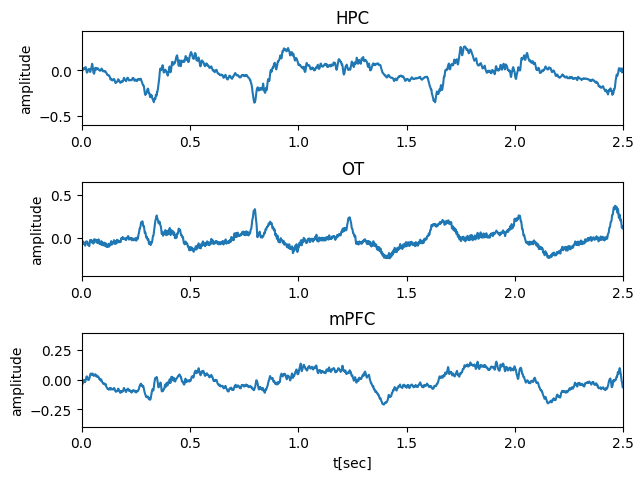

In [4]:

#################################################
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.tight_layout(pad=2.0)
time_scale = [i/data['srate'] for i in range(0,len(data['data_infrmation']['channelData']))]
ax1.plot(time_scale,data['data_infrmation']['channelData'][:,0])
ax1.set_xlim([0,2.5])
ax1.set_title('HPC')
ax1.set_ylabel('amplitude')
ax2.plot(time_scale,data['data_infrmation']['channelData'][:,1])
ax2.set_xlim([0,2.5])
ax2.set_title('OT')
ax2.set_ylabel('amplitude')
ax3.plot(time_scale,data['data_infrmation']['channelData'][:,2])
ax3.set_xlim([0,2.5])
ax3.set_title('mPFC')
ax3.set_ylabel('amplitude')
ax3.set_xlabel('t[sec]')
#################################################



# Power Spectrum Density (PSD)
Calculate and plot the power spectrum density for the frequency range up to 40Hz in each channel of the raw LFP signals. You can employ a simple FFT for this task. *`5 Points`*

In [5]:
def calc_PSD(data):
    ##############################
    frequencies, Pxx = sp.signal.periodogram(data, fs=2000)
    return frequencies, Pxx
    ##############################
    pass

Text(0.5, 23.52222222222222, 'frequency [Hz]')

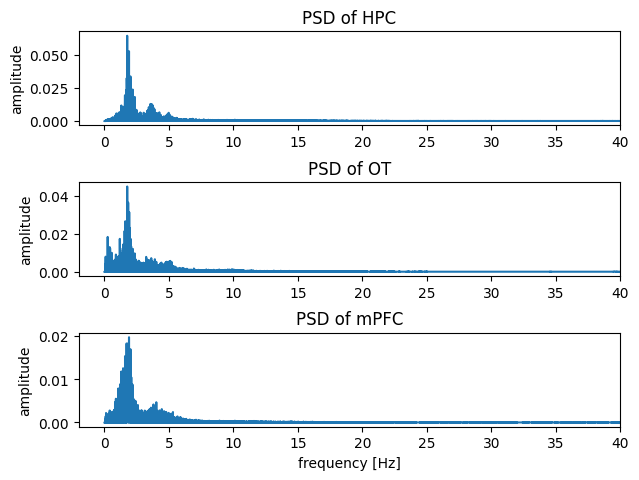

In [6]:

####################################################################
frequencies, Pxx_HPC = calc_PSD(data['data_infrmation']['channelData'][:,0])
frequencies, Pxx_OT = calc_PSD(data['data_infrmation']['channelData'][:,1])
frequencies, Pxx_mPFC = calc_PSD(data['data_infrmation']['channelData'][:,2])
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.tight_layout(pad=2.0)
ax1.plot(frequencies,Pxx_HPC)
ax1.set_xlim([-2,40])
ax1.set_title('PSD of HPC')
ax1.set_ylabel('amplitude')
ax2.plot(frequencies,Pxx_OT)
ax2.set_xlim([-2,40])
ax2.set_title('PSD of OT')
ax2.set_ylabel('amplitude')
ax3.plot(frequencies,Pxx_mPFC)
ax3.set_xlim([-2,40])
ax3.set_title('PSD of mPFC')
ax3.set_ylabel('amplitude')
ax3.set_xlabel('frequency [Hz]')
####################################################################


Compute the average power of the theta band (4Hz-8Hz) for each channel and create a bar plot to display the results. *`2 Points`* <br>

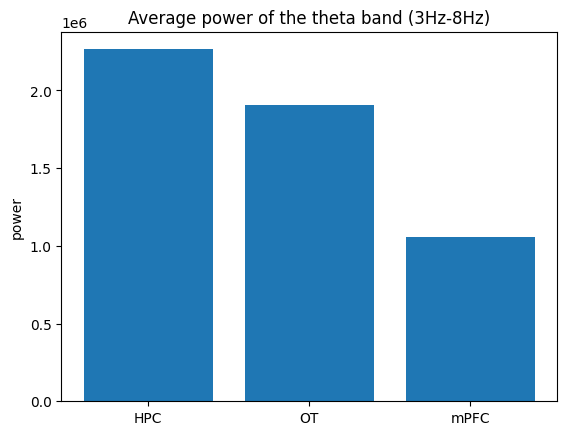

In [7]:

##################################################


n = len(data['data_infrmation']['channelData'])



fft_tetha_band_HPC = sp.fft.fft(data['data_infrmation']['channelData'][:,0])
frequencies_HPC = sp.fft.fftfreq(n, 1/data['srate'])
tetha_band_HPC  = (frequencies_HPC >= 3) & (frequencies_HPC<= 8)

fft_tetha_band_OT = sp.fft.fft(data['data_infrmation']['channelData'][:,1])
frequencies_OT = sp.fft.fftfreq(n, 1/data['srate'])
tetha_band_OT  = (frequencies_OT >= 3) & (frequencies_OT<= 8)

fft_tetha_band_mPFC = sp.fft.fft(data['data_infrmation']['channelData'][:,2])
frequencies_mPFC = sp.fft.fftfreq(n, 1/data['srate'])
tetha_band_mPFC  = (frequencies_mPFC >= 3) & (frequencies_mPFC<= 8)

average_power_tetha_band_HPC = np.mean(np.abs(fft_tetha_band_HPC[tetha_band_HPC])**2)
average_power_tetha_band_OT = np.mean(np.abs(fft_tetha_band_OT[tetha_band_OT])**2)
average_power_tetha_band_mPFC = np.mean(np.abs(fft_tetha_band_mPFC[tetha_band_mPFC])**2)

categories = ['HPC','OT','mPFC']
values = [average_power_tetha_band_HPC,average_power_tetha_band_OT,average_power_tetha_band_mPFC]
plt.bar(categories,values)
plt.title('Average power of the theta band (3Hz-8Hz)')
plt.ylabel('power')
plt.show()
##################################################


The plot should be like this: <br>

![](./Figures/01.png)

`Theorical Question 2:` Why is the theta power is higher in the hippocampus compared to other regions? Do a little research :D *`3 Points`*
 
The heightened theta power in the hippocampus compared to other brain regions can be attributed to various factors:

- Role of the Hippocampus in Cognition:
The hippocampus is integral to cognitive functions like spatial navigation, memory formation, and learning. Theta oscillations (4-8 Hz) are notably prevalent in this region and are linked to these cognitive processes. The rhythmic nature of theta oscillations aids in encoding and recalling spatial and episodic memories, as well as integrating sensory input during navigation tasks.

- Mechanisms of Theta Generation:
Complex interactions among intrinsic properties of hippocampal neurons, recurrent synaptic circuits, and modulatory inputs from neighboring brain regions, such as the medial septum and entorhinal cortex, generate theta oscillations. This interplay creates a network of theta-generating neurons in the hippocampus, showcasing synchronized rhythmic activity and resulting in heightened theta power.

- Theta Phase Coding Hypothesis: The theta phase coding hypothesis suggests that theta oscillations' phase acts as a temporal reference frame for information encoding and retrieval in the hippocampus. Neuronal firing patterns within the hippocampus align with theta oscillation phases, allowing precise timing of action potentials during memory tasks. This synchronization enhances information processing efficiency and synaptic plasticity within hippocampal circuits, contributing to elevated theta power.

- Structural Features: Distinct anatomical and structural characteristics of the hippocampus, including its laminar organization and dense excitatory neuron population, may bolster theta oscillation generation and amplification. The intricate microcircuitry within the hippocampus facilitates synchronized neuronal activity across various layers and subregions, resulting in heightened theta power compared to brain regions with less specialized functions.






# Preprocessing
First thing first, filter each channel between 0.5Hz-128Hz. *`3 Points`* <br>
**Note: Use zero-phase filter to maintain the time features of the signals after filtering.**

Text(0.5, 23.52222222222222, 't[sec]')

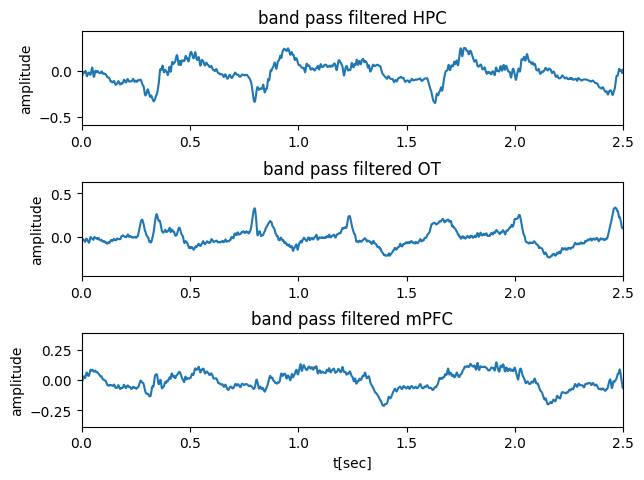

In [8]:
def BPF_filter(data,frq_low,frq_high,filt_order):
    
    ##############################
    fs = 2000
    nyq = 0.5 * fs
    low = frq_low / nyq
    high = frq_high / nyq
    b, a = sp.signal.butter(filt_order, [low, high], btype='band')
    bpf = []
    for i in range(0,3):
        bpf.append(sp.signal.filtfilt(b, a, data[:,i])) 
    return bpf
    ##############################
    pass


bpf = BPF_filter(data['data_infrmation']['channelData'],0.5,128,4)
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.tight_layout(pad=2.0)
time_scale = [i/data['srate'] for i in range(0,len(bpf[0]))]
ax1.plot(time_scale,bpf[0])
ax1.set_xlim([0,2.5])
ax1.set_title('band pass filtered HPC')
ax1.set_ylabel('amplitude')
ax2.plot(time_scale,bpf[1])
ax2.set_xlim([0,2.5])
ax2.set_title('band pass filtered OT')
ax2.set_ylabel('amplitude')
ax3.plot(time_scale,bpf[2])
ax3.set_xlim([0,2.5])
ax3.set_title('band pass filtered mPFC')
ax3.set_ylabel('amplitude')
ax3.set_xlabel('t[sec]')

Next, epoch the data according to each event (banana and lime) as you've done at the previous practice. Each trial must contain `1.5` seconds before and `3` seconds after the onset of each stimulus. Consider computing zscore of time series in each trial. *`3 Points`*

In [9]:
def epoch_data(data, time_interval): 
    bpf = BPF_filter(data,0.5,128,4)
    fs = 2000   
    data_epoched_Banana = []
    data_epoched_Lime = []
    before_interval_sample = fs*time_interval[0]
    after_interval_sample = fs*time_interval[1]
    pre_index = 0
    start_indexes_40 = []
    len_data = len(data[:,3])
    for i in range(len_data):
        if int(data[i,3]) == 40 and int(data[pre_index,3]) != 40:
            start_indexes_40.append(i)
        pre_index = i
    pre_index = 0
    start_indexes_20 = []
    len_data = len(data[:,3])
    for i in range(len_data):
        if int(data[i,3]) == 20 and int(data[pre_index,3]) != 20:
            start_indexes_20.append(i)
        pre_index = i
    for i in range(len(start_indexes_20)):
        data_epoched_Banana.append(sp.stats.zscore(data[int(start_indexes_20[i] - before_interval_sample) : int(start_indexes_20[i] + after_interval_sample) , 0:3]))
    for i in range(len(start_indexes_40)):
        data_epoched_Lime.append(sp.stats.zscore(data[int(start_indexes_40[i] - before_interval_sample) : int(start_indexes_40[i] + after_interval_sample) , 0:3]))
    data_epoched = [data_epoched_Banana,data_epoched_Lime]
    return data_epoched
    pass

# Event-Related Potential (ERP)
Compute the Event-Related Potential (ERP) for each channel and event in all channels as you've done at the previous practice. Plot them for each event. *`5 Points`* <br>
 **Note: Consider using baseline rejection: ERP_signal - mean(ERP_signal(before stimulus))**

In [10]:
def calc_ERP(data,time_interval,fs):
    data_for_erp = np.sum(data,axis=0)/len(data)
    rejected = data_for_erp - np.mean(data_for_erp[0:int(fs*time_interval[0])])
    return rejected
    pass

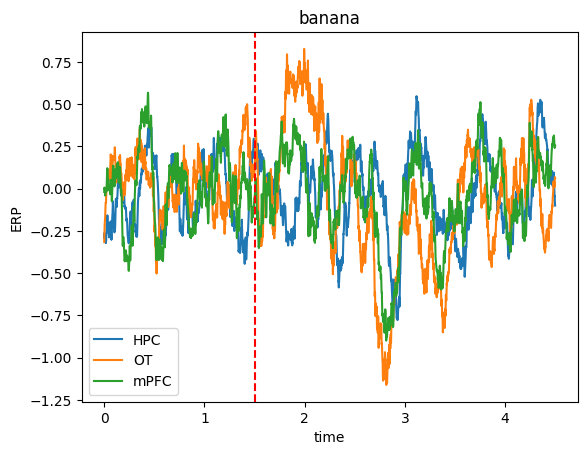

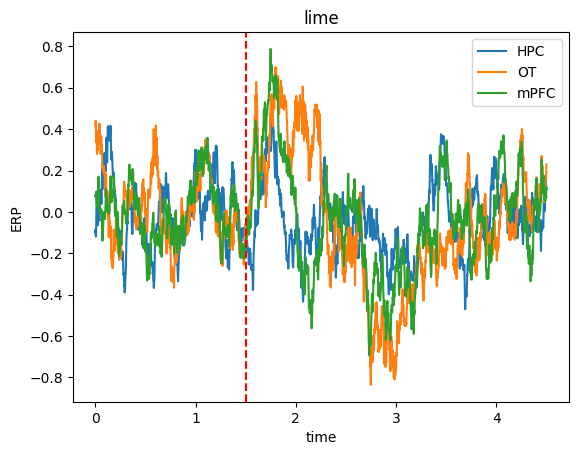

In [11]:
data_after_preprocess = epoch_data(data['data_infrmation']['channelData'], [1.5,3])
banana_after_preprocess = data_after_preprocess[0]
lime_after_preprocess = data_after_preprocess[1]
banana_erp = calc_ERP(banana_after_preprocess,[1.5,3],data['srate'])
lime_erp = calc_ERP(lime_after_preprocess,[1.5,3],data['srate'])
plt.plot([i/2000 for i in range(0,len(banana_after_preprocess[0][:,0]))],banana_erp)
plt.axvline(x=1.5, color='r', linestyle='--')
plt.xlabel('time')
plt.ylabel('ERP')
plt.title('banana')
plt.legend(['HPC','OT','mPFC'])
plt.show()
plt.plot([i/2000 for i in range(0,len(lime_after_preprocess[0][:,0]))],lime_erp)
plt.axvline(x=1.5, color='r', linestyle='--')
plt.xlabel('time')
plt.ylabel('ERP')
plt.title('lime')
plt.legend(['HPC','OT','mPFC'])
plt.show()

You should generate a plot like this for each odorant: <br>

![](./Figures/03-ERP-ban.png)

# Phase-Lock Value (PLV)

In the previous practice, you studied the phase-lock value as a method for evaluation of functional connectivity between different parts of brain. Now, we aim to implement it for the olfactory task and investigate the effect of odorants on the connections between channels. You can use [this paper](https://doi.org/10.1016%2Fj.neuroimage.2013.02.008) for more help. <br>

Compute the phase-lock value between different channels for `1.5sec` before and `1.5sec` after the onset of the stimulus for each trials across a frequency range of `20Hz-60Hz` for both odorants. Next, determine the mean and standard error of the calculated phase-lock values across trials. At the end, create a plot showing the bounded lines for phase-lock values at various frequencies. Compare the results before and after stimulus. *`20 Points`*

In [186]:
def calc_PLV(data, frq_range, time_range, filt_order):
    fs = 700
    nyq = 0.5 * fs
    freq = frq_range[0]
    delta_phi_1_2 = []
    delta_phi_1_3 = []
    delta_phi_2_3 = []
    plv_1_2_banana = []
    plv_1_3_banana = []
    plv_2_3_banana = []
    plv_1_2_lime = []
    plv_1_3_lime = []
    plv_2_3_lime = []
    step = 1
    while freq <= frq_range[1]-step:
        low = freq / nyq
        high = (freq+step) / nyq
        b,a = sp.signal.butter(filt_order, [low, high], btype='band')
        new_data_1 = sp.signal.filtfilt(b, a, data['data_infrmation']['channelData'][:,0])
        new_data_2 = sp.signal.filtfilt(b, a, data['data_infrmation']['channelData'][:,1])
        new_data_3 = sp.signal.filtfilt(b, a, data['data_infrmation']['channelData'][:,2])
        new_data = np.transpose(np.array([new_data_1,new_data_2,new_data_3,data['data_infrmation']['channelData'][:,3]]))
        epoched_data = epoch_data(new_data, time_range)
        banana_data = epoched_data[0]
        lime_data = epoched_data[1]
        bpf_banana = [np.transpose(banana_data[i]) for i in range(len(banana_data))]
        bpf_lime = [np.transpose(lime_data[i]) for i in range(len(lime_data))]
        for i in range(len(bpf_banana)):
            for j in range(i,len(bpf_banana)):
                multi_hpc = np.array([1j for t in range(len(bpf_banana[i][0]))])
                multi_OT = np.array([1j for t in range(len(bpf_banana[j][1]))])
                analytic_signal_HPC = multi_hpc*sp.signal.hilbert(bpf_banana[i][0])+bpf_banana[i][0]
                analytic_signal_OT = multi_OT*sp.signal.hilbert(bpf_banana[j][1])+bpf_banana[j][1]
                delta_phi_1_2.append(np.arctan((analytic_signal_HPC*analytic_signal_OT.conjugate())/(np.abs(analytic_signal_HPC)*np.abs(analytic_signal_OT))))
        multi = np.array([1j for i in range(len(delta_phi_1_2[0]))])
        plv_1_2_banana.append(np.abs(np.mean(np.exp(multi*delta_phi_1_2))))   
        for i in range(len(bpf_banana)):
            for j in range(i,len(bpf_banana)):
                multi_hpc = np.array([1j for t in range(len(bpf_banana[i][0]))])
                multi_mpfc = np.array([1j for t in range(len(bpf_banana[j][2]))])
                analytic_signal_HPC = multi_hpc*sp.signal.hilbert(bpf_banana[i][0])+bpf_banana[i][0]
                analytic_signal_mpfc = multi_mpfc*sp.signal.hilbert(bpf_banana[j][2])+bpf_banana[j][2]
                delta_phi_1_3.append(np.angle((analytic_signal_HPC*analytic_signal_mpfc.conjugate())/(np.abs(analytic_signal_HPC)*np.abs(analytic_signal_mpfc))))
        multi = np.array([1j for i in range(len(delta_phi_1_3[0]))])
        plv_1_3_banana.append(np.abs(np.mean(np.exp(multi*delta_phi_1_3))))
        for i in range(len(bpf_banana)):
            for j in range(i,len(bpf_banana)):
                multi_mpfc = np.array([1j for t in range(len(bpf_banana[j][2]))])
                multi_OT = np.array([1j for t in range(len(bpf_banana[i][1]))])
                analytic_signal_OT = multi_OT*sp.signal.hilbert(bpf_banana[i][1])+bpf_banana[i][1]
                analytic_signal_mpfc = multi_mpfc*sp.signal.hilbert(bpf_banana[j][2])+bpf_banana[j][2]
                delta_phi_2_3.append(np.angle((analytic_signal_OT*analytic_signal_mpfc.conjugate())/(np.abs(analytic_signal_OT)*np.abs(analytic_signal_mpfc))))
        multi = np.array([1j for i in range(len(delta_phi_2_3[0]))])
        plv_2_3_banana.append(np.abs(np.mean(np.exp(multi*delta_phi_2_3))))
        for i in range(len(bpf_lime)):
            for j in range(i,len(bpf_lime)):
                multi_hpc = np.array([1j for t in range(len(bpf_lime[i][0]))])
                multi_OT = np.array([1j for t in range(len(bpf_lime[j][1]))])
                analytic_signal_HPC = multi_hpc*sp.signal.hilbert(bpf_lime[i][0])+bpf_lime[i][0]
                analytic_signal_OT = multi_OT*sp.signal.hilbert(bpf_lime[j][1])+bpf_lime[j][1]
                delta_phi_1_2.append(np.arctan((analytic_signal_HPC*analytic_signal_OT.conjugate())/(np.abs(analytic_signal_HPC)*np.abs(analytic_signal_OT))))
        multi = np.array([1j for i in range(len(delta_phi_1_2[0]))])
        plv_1_2_lime.append(np.abs(np.mean(np.exp(multi*delta_phi_1_2))))   
        for i in range(len(bpf_lime)):
            for j in range(i,len(bpf_lime)):
                multi_hpc = np.array([1j for t in range(len(bpf_lime[i][0]))])
                multi_mpfc = np.array([1j for t in range(len(bpf_lime[j][2]))])
                analytic_signal_HPC = multi_hpc*sp.signal.hilbert(bpf_lime[i][0])+bpf_lime[i][0]
                analytic_signal_mpfc = multi_mpfc*sp.signal.hilbert(bpf_lime[j][2])+bpf_lime[j][2]
                delta_phi_1_3.append(np.angle((analytic_signal_HPC*analytic_signal_mpfc.conjugate())/(np.abs(analytic_signal_HPC)*np.abs(analytic_signal_mpfc))))
        multi = np.array([1j for i in range(len(delta_phi_1_3[0]))])
        plv_1_3_lime.append(np.abs(np.mean(np.exp(multi*delta_phi_1_3))))
        for i in range(len(bpf_lime)):
            for j in range(i,len(bpf_lime)):
                multi_mpfc = np.array([1j for t in range(len(bpf_lime[j][2]))])
                multi_OT = np.array([1j for t in range(len(bpf_lime[i][1]))])
                analytic_signal_OT = multi_OT*sp.signal.hilbert(bpf_lime[i][1])+bpf_lime[i][1]
                analytic_signal_mpfc = multi_mpfc*sp.signal.hilbert(bpf_lime[j][2])+bpf_lime[j][2]
                delta_phi_2_3.append(np.angle((analytic_signal_OT*analytic_signal_mpfc.conjugate())/(np.abs(analytic_signal_OT)*np.abs(analytic_signal_mpfc))))
        multi = np.array([1j for i in range(len(delta_phi_2_3[0]))])
        plv_2_3_lime.append(np.abs(np.mean(np.exp(multi*delta_phi_2_3))))
        freq = freq +step 
    return plv_1_2_banana,plv_1_3_banana,plv_2_3_banana,plv_1_2_lime,plv_1_3_lime,plv_2_3_lime
    pass


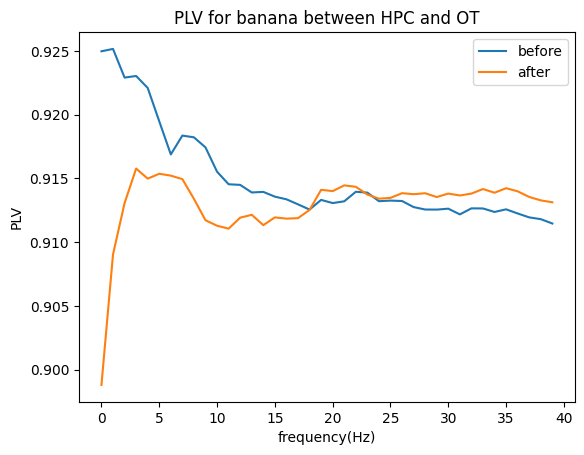

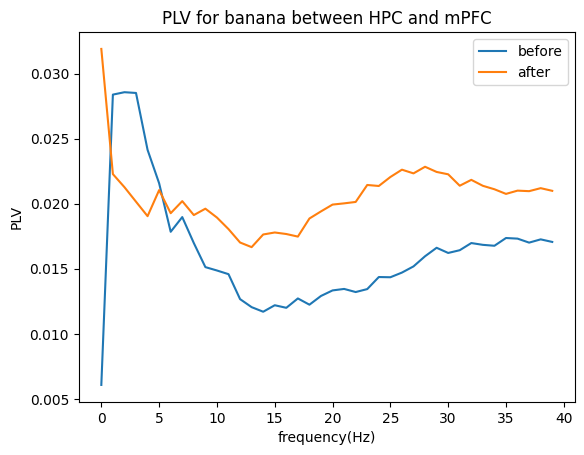

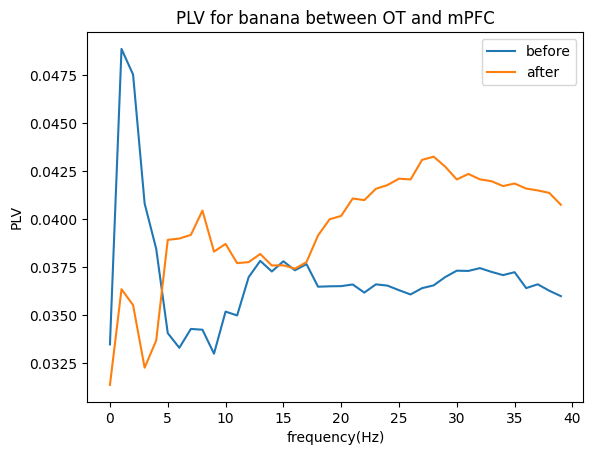

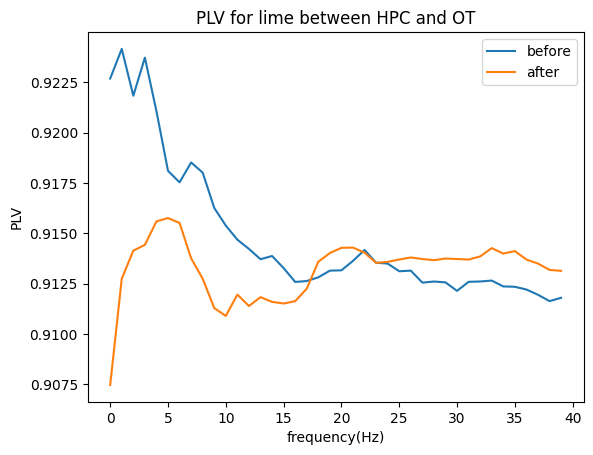

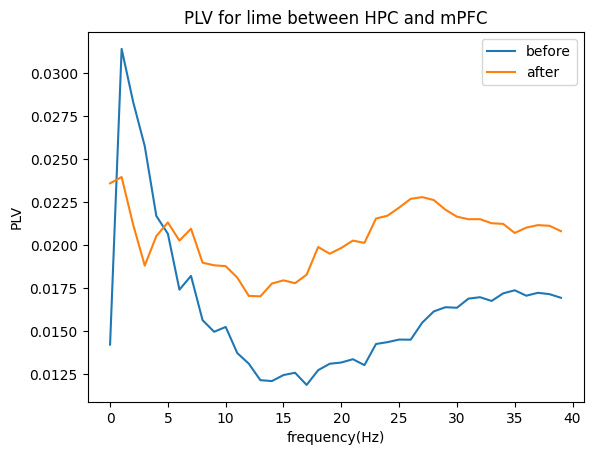

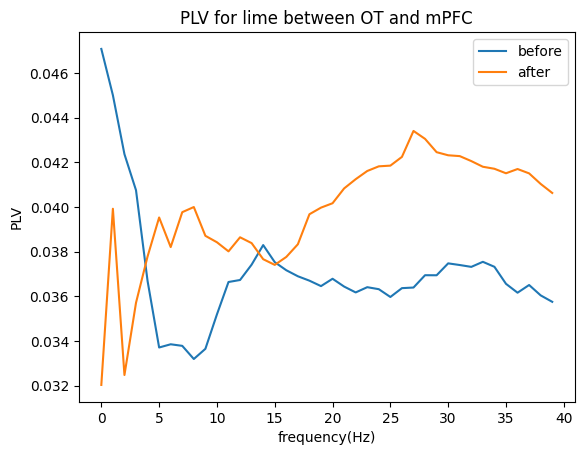

In [187]:
plv_1_2_banana_bf,plv_1_3_banana_bf,plv_2_3_banana_bf,plv_1_2_lime_bf,plv_1_3_lime_bf,plv_2_3_lime_bf = calc_PLV(data, [20,60], [1.5,0],3)
plv_1_2_banana_af,plv_1_3_banana_af,plv_2_3_banana_af,plv_1_2_lime_af,plv_1_3_lime_af,plv_2_3_lime_af = calc_PLV(data, [20,60], [0,1.5],3)
plt.plot(plv_1_2_banana_bf)
plt.plot(plv_1_2_banana_af)
plt.xlabel('frequency(Hz)')
plt.ylabel('PLV')
plt.title('PLV for banana between HPC and OT')
plt.legend(['before','after'])
plt.show()
plt.plot(plv_1_3_banana_bf)
plt.plot(plv_1_3_banana_af)
plt.xlabel('frequency(Hz)')
plt.ylabel('PLV')
plt.title('PLV for banana between HPC and mPFC')
plt.legend(['before','after'])
plt.show()
plt.plot(plv_2_3_banana_bf)
plt.plot(plv_2_3_banana_af)
plt.xlabel('frequency(Hz)')
plt.ylabel('PLV')
plt.title('PLV for banana between OT and mPFC')
plt.legend(['before','after'])

plt.show()
plt.plot(plv_1_2_lime_bf)
plt.plot(plv_1_2_lime_af)
plt.xlabel('frequency(Hz)')
plt.ylabel('PLV')
plt.title('PLV for lime between HPC and OT')
plt.legend(['before','after'])
#plt.xlim(20,60)
plt.show()
plt.plot(plv_1_3_lime_bf)
plt.plot(plv_1_3_lime_af)
plt.xlabel('frequency(Hz)')
plt.ylabel('PLV')
plt.title('PLV for lime between HPC and mPFC')
plt.legend(['before','after'])
#plt.xlim(20,60)
plt.show()
plt.plot(plv_2_3_lime_bf)
plt.plot(plv_2_3_lime_af)
plt.xlabel('frequency(Hz)')
plt.ylabel('PLV')
plt.title('PLV for lime between OT and mPFC')
plt.legend(['before','after'])
#plt.xlim(20,60)
plt.show()

You should generate plots like this between all channels for both odorants:<br>

![](./Figures/02-PLV.png)

# Phase-Amplitude Coupling (PAC)

One of the recent methods used for studying functional connectivity is Phase-Amplitude Coupling (PAC). This method is widely used to explain the way of communication among various neural populations in the brain. For more detailed information on PAC and how it's calculated, you can refer to [this paper](https://doi.org/10.1038/s41598-019-48870-2). Moreover, [this paper](https://doi.org/10.1038/s41598-019-43272-w) has also explained how different neural networks communicate through their theta and gamma oscillations to transfer information.

`Theorical Question 3:` Read both papers and explain the process of calculating PAC and how we infer PAC as a metric for communication between different neural oscillations. `5 Points`

**Note: You don't have to read both papers in detail; just simply collect the information you NEED :D**

Now, we aim to analyze the data and compute the Phase-Amplitude Coupling (PAC) for each channel. First thing first, as explained in [the paper](https://doi.org/10.1038/s41598-019-48870-2) you've read, we need to find the Bilinear time–frequency distribution of the signal using the RID-Rihaczek method. The code for this is provided below:

In [15]:
## DON'T CHANGE THE CODES OF THIS BLOCK

def _rhu(n):
    '''
    Return integer rounded of the input. The half will round up.
    1.3 -> 1
    2.5 -> 3
    -0.5 -> 0
    -0.3 -> -1
    '''
    return int(math.floor(n + 0.5))


def _datawrap(x: np.ndarray, n: int) -> np.ndarray:
    '''
    The calculation of signal spectrum, such as periodogram, uses FFT internally, 
    where the length of FFT is denoted as NFFT. In theory, when using FFT, 
    the signal in both time domain and frequency domain are discrete and periodic, 
    where the period is given by NFFT. Hence, if you specify an NFFT that is less 
    than the signal length, it actually introduces the aliasing in the time domain 
    and make the signal (even if its length is N>NFFT) periodic with NFFT. 
    When you take FFT of this sequence, you are working with this aliased sequence. 
    This is what datawrap do for you. 

    For example: Sequence 1 2 3 4 5, period 5, it returns
        1 2 3 4 5
                  1 2 3 4 5
                            1 2 3 4 5
        --------------------------------
              ... 1 2 3 4 5 ...

    i.e., original series. assume a period of 3, then it looks like

        1 2 3 4 5
              1 2 3 4 5
                    1 2 3 4 5
        ------------------------
          ... 5 7 3 ...

    A sequence that is wrapped around and has only a length of 3.

    >>> _datawrap(range(1, 6),3)
    array([5, 7, 3])

    '''
    return np.array([sum(x[i::n]) for i in range(n)])


def _chwi_krn(D: np.ndarray, L: np.ndarray, A: int = None):
    '''

    CHWI_KRN Choi-Williams kernel function.

    https://en.wikipedia.org/wiki/Bilinear_time%E2%80%93frequency_distribution#Choi%E2%80%93Williams_distribution_function

    K = _chwi_krn(D, L, A) returns the values K of the Choi-Williams kernel function
    evaluated at the doppler-values in matrix D and the lag-values in matrix L.
    Matrices D and L must have the same size. The values in D should be in the range
    between -1 and +1 (with +1 being the Nyquist frequency). The parameter A is
    optional and controls the "diagonal bandwidth" of the kernel. Matrix K is of the
    same size as the matrices D and L. Parameter A defaults to 10 if omitted.

    Copyright (c) 1998 by Robert M. Nickel
    Revision: 1.1.1.1
    Date: 2001/03/05 09:09:36

    Written by: Mahdi Kiani, March 2021

    '''

    if A is None:
        A = 10
    K = np.exp((-1/(A*A)) * (D*D*L*L))

    return K

def rid_rihaczek(x: np.ndarray, fbins: int):
    '''
    Munia, T.T.K., Aviyente, S. Time-Frequency Based Phase-Amplitude
    Coupling Measure For Neuronal Oscillations. Sci Rep 9, 12441 (2019).
    https://doi.org/10.1038/s41598-019-48870-2

    This function computes reduced interference Rihaczek distribution

    Parameter:
        x: signal
        fbins=required frequency bins

    Returns:
        tfd = Generated reduced interference Rihaczek distribution

    Written by: Mahdi Kiani, March 2021
    '''

    tbins = x.shape[0]
    amb = np.zeros((tbins, tbins))
    for tau in range(tbins):
        amb[tau, :] = (np.conj(x) * np.concatenate((x[tau:], x[:tau])))

    ambTemp = np.concatenate(
        (amb[:, _rhu(tbins/2):], amb[:, :_rhu(tbins/2)]), axis=1)
    amb1 = np.concatenate(
        (ambTemp[_rhu(tbins/2):, :], ambTemp[:_rhu(tbins/2), :]), axis=0)

    D = np.outer(np.linspace(-1, 1, tbins), np.linspace(-1, 1, tbins), )
    K = _chwi_krn(D, D, 0.01)
    df = K[:amb1.shape[0], :amb1.shape[1]]
    ambf = amb1 * df

    A = np.zeros((fbins, tbins))
    tbins = tbins - 1

    if tbins != fbins:
        for tt in range(tbins):
            A[:, tt] = _datawrap(ambf[:, tt], fbins)
    else:
        A = ambf

    tfd = np.fft.fft(A, axis=0)

    return tfd

Next, compute the local Phase-Amplitude Coupling (l-PAC) within each channel and the inter-regional PAC (ir-PAC) across different channels for **ERP signals**. Calculate these values for each phase and amplitude frequency within a time interval of `1sec` before and `1sec` after the onset of stimulation for both odorants. The phase frequency should be in the theta band `4Hz-8Hz`, and the amplitude frequency should be in the low gamma band `20Hz-60Hz`. Afterwards, plot the comodulograms ([f_phase, f_amplitude, PAC] plot) and compare the results before and after the stimulus. *`20 Points`* <br>

**Note: Ensure that the scale of PACs in plots is equalized before and after the stimulus to make them comparable.** 

In [66]:
def calc_MVL(tfd1, tfd2, fph, famp):
    tfd11 = tfd1[fph,:]
    tfd22 = tfd2[famp,:]
    const = []
    for i in range(len(tfd22)):
        const.append(tfd22[i]*np.exp(1j*tfd11[i]))
    return np.abs((1/len(tfd22))*np.sum(const))
    pass

def calc_PAC(data, fph_range, famp_range, time_range):
    fs = 2000
    pac_banana_HPC = [[] for _ in range(5)]
    pac_banana_OT = [[] for _ in range(5)]
    pac_banana_mPFC = [[] for _ in range(5)]
    pac_lime_HPF = [[] for _ in range(5)]
    pac_lime_OT = [[] for _ in range(5)]
    pac_lime_mPFC = [[] for _ in range(5)]
    banana_erp_t = data[0]
    lime_erp_t = data[1]
    ############
    banana_HPC_t = rid_rihaczek(banana_erp_t[0],fs)
    banana_HPC = banana_HPC_t[0:int(len(banana_HPC_t)/2)-1,:]
    banana_OT_t = rid_rihaczek(banana_erp_t[1],fs)
    banana_OT = banana_OT_t[0:int(len(banana_OT_t)/2)-1,:]
    banana_mPFC_t = rid_rihaczek(banana_erp_t[2],fs)
    banana_mPFC = banana_mPFC_t[0:int(len(banana_mPFC_t)/2)-1,:]
    ##
    lime_HPC_t = rid_rihaczek(lime_erp_t[0],fs)
    lime_HPC = lime_HPC_t[0:int(len(lime_HPC_t)/2)-1,:]
    lime_OT_t = rid_rihaczek(lime_erp_t[1],fs)
    lime_OT = lime_OT_t[0:int(len(lime_OT_t)/2)-1,:]
    lime_mPFC_t = rid_rihaczek(lime_erp_t[2],fs)
    lime_mPFC = lime_mPFC_t[0:int(len(lime_mPFC_t)/2)-1,:]
    ############
    banana_HPC_angle = np.angle(banana_HPC)
    banana_HPC_abs = np.abs(banana_HPC)
    banana_HPC_angle_low = banana_HPC_angle[fph_range[0]-1:fph_range[1],:]
    banana_HPC_abs_high = banana_HPC_abs[famp_range[0]-1:famp_range[1],:]
    ##
    banana_OT_angle = np.angle(banana_OT)
    banana_OT_abs = np.abs(banana_OT)
    banana_OT_angle_low = banana_OT_angle[fph_range[0]-1:fph_range[1],:]
    banana_OT_abs_high = banana_OT_abs[famp_range[0]-1:famp_range[1],:]
    ##
    banana_mPFC_angle = np.angle(banana_mPFC)
    banana_mPFC_abs = np.abs(banana_mPFC)
    banana_mPFC_angle_low = banana_mPFC_angle[fph_range[0]-1:fph_range[1],:]
    banana_mPFC_abs_high = banana_mPFC_abs[famp_range[0]-1:famp_range[1],:]
    ##
    lime_HPC_angle = np.angle(lime_HPC)
    lime_HPC_abs = np.abs(lime_HPC)
    lime_HPC_angle_low = lime_HPC_angle[fph_range[0]-1:fph_range[1],:]
    lime_HPC_abs_high = lime_HPC_abs[famp_range[0]-1:famp_range[1],:]
    ##
    lime_OT_angle = np.angle(lime_OT)
    lime_OT_abs = np.abs(lime_OT)
    lime_OT_angle_low = lime_OT_angle[fph_range[0]-1:fph_range[1],:]
    lime_OT_abs_high = lime_OT_abs[famp_range[0]-1:famp_range[1],:]
    ##
    lime_mPFC_angle = np.angle(lime_mPFC)
    lime_mPFC_abs = np.abs(lime_mPFC)
    lime_mPFC_angle_low = lime_mPFC_angle[fph_range[0]-1:fph_range[1],:]
    lime_mPFC_abs_high = lime_mPFC_abs[famp_range[0]-1:famp_range[1],:]
    ##
    for i in range(fph_range[0]-1,fph_range[1]):
        for j in range(famp_range[0]-1,famp_range[1]):
            pac_banana_HPC[i-3].append(calc_MVL(banana_HPC_angle_low,banana_HPC_abs_high, i-3,j-19))
            pac_banana_OT[i-3].append(calc_MVL(banana_OT_angle_low,banana_OT_abs_high, i-3,j-19))
            pac_banana_mPFC[i-3].append(calc_MVL(banana_mPFC_angle_low,banana_mPFC_abs_high, i-3,j-19))
            pac_lime_HPF[i-3].append(calc_MVL(lime_HPC_angle_low,lime_HPC_abs_high, i-3,j-19))
            pac_lime_OT[i-3].append(calc_MVL(lime_OT_angle_low,lime_OT_abs_high, i-3,j-19))
            pac_lime_mPFC[i-3].append(calc_MVL(lime_mPFC_angle_low,lime_mPFC_abs_high, i-3,j-19))
    return [pac_banana_HPC,pac_banana_OT,pac_banana_mPFC,pac_lime_HPF,pac_lime_OT,pac_lime_mPFC]
    pass



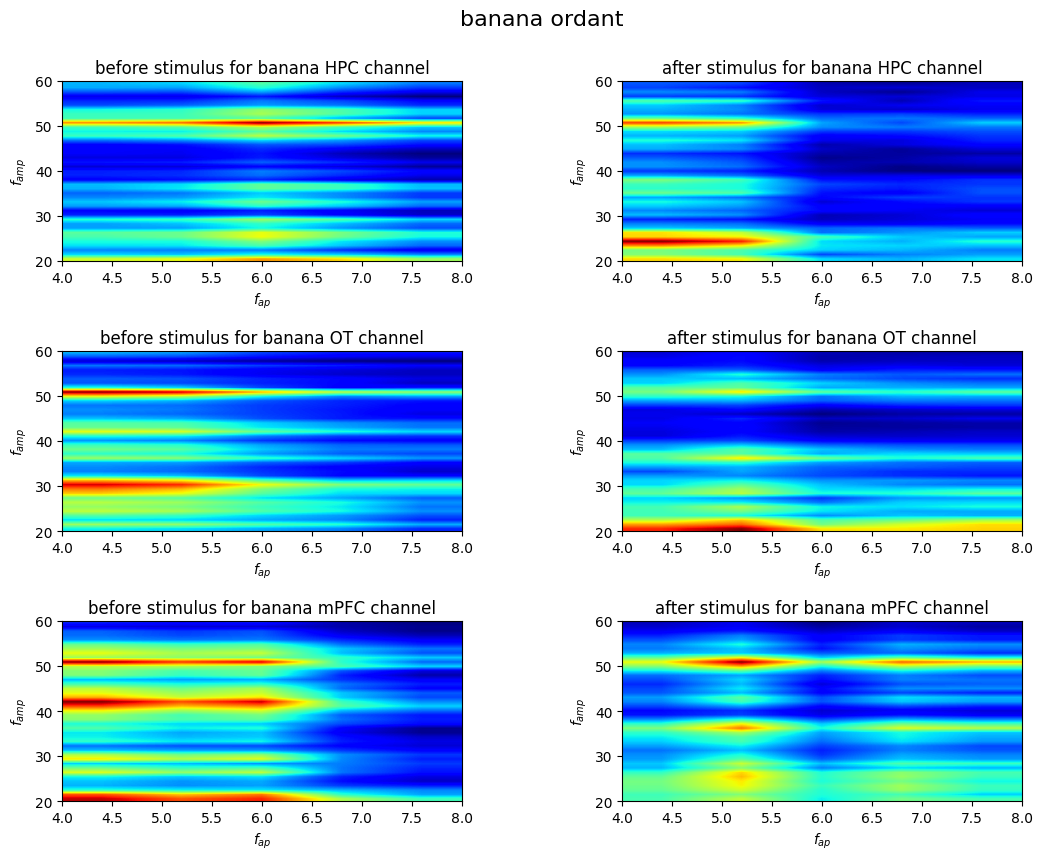

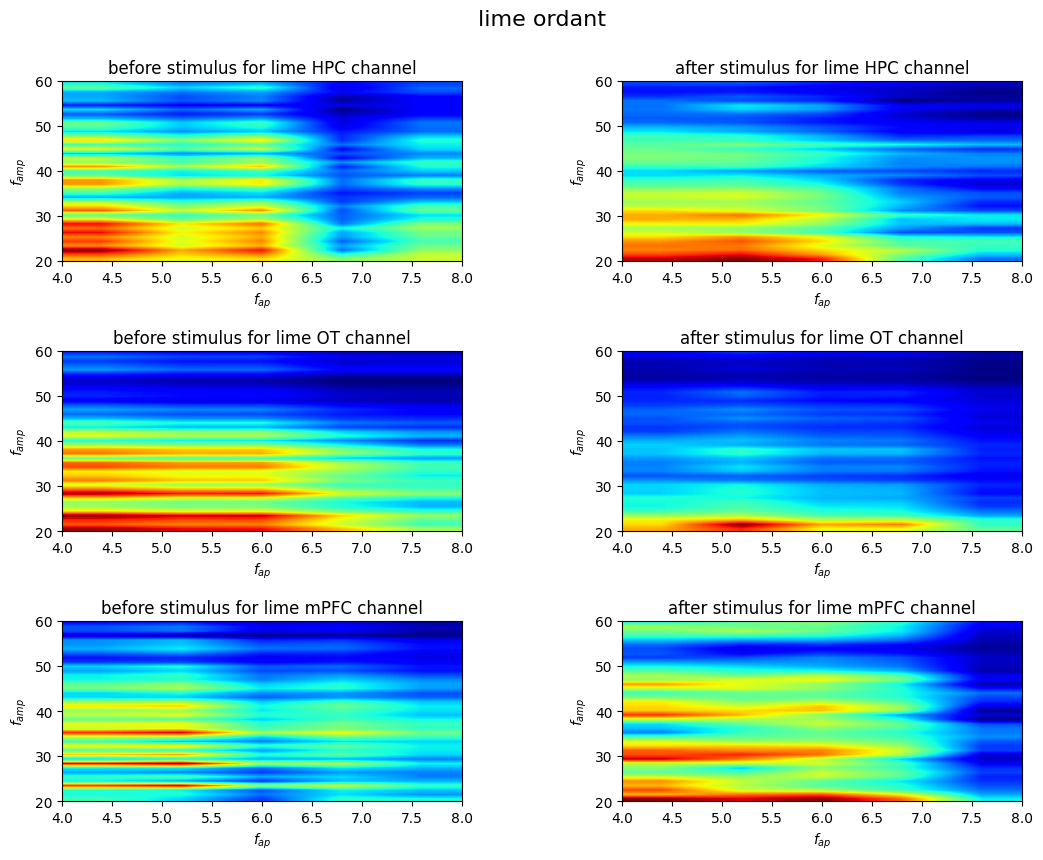

In [68]:
data_after_preprocess = epoch_data(data['data_infrmation']['channelData'],[1,0])
banana_after_preprocess = data_after_preprocess[0]
lime_after_preprocess = data_after_preprocess[1]
banana_erp = calc_ERP(banana_after_preprocess,[1,0],data['srate'])
lime_erp = calc_ERP(lime_after_preprocess,[1,0],data['srate'])
data_after_preprocess1 = epoch_data(data['data_infrmation']['channelData'],[0.001,1])
banana_after_preprocess1 = data_after_preprocess1[0]
lime_after_preprocess1 = data_after_preprocess1[1]
banana_erp1 = calc_ERP(banana_after_preprocess1,[0.001,1],data['srate'])
lime_erp1 = calc_ERP(lime_after_preprocess1,[0.001,1],data['srate'])
[pac_banana_HPF_bf,pac_banana_OT_bf,pac_banana_mPFC_bf,pac_lime_HPF_bf,pac_lime_OT_bf,pac_lime_mPFC_bf] = calc_PAC([np.transpose(banana_erp),np.transpose(lime_erp)], [4,8], [20,60], [1,0])
[pac_banana_HPF_af,pac_banana_OT_af,pac_banana_mPFC_af,pac_lime_HPF_af,pac_lime_OT_af,pac_lime_mPFC_af] = calc_PAC([np.transpose(banana_erp1),np.transpose(lime_erp1)], [4,8], [20,60], [0.001,1])
plt.figure(figsize=(12, 9))
plt.suptitle('banana ordant', fontsize=16)
plt.subplot(3, 2,1)
plt.imshow(np.transpose(pac_banana_HPF_bf), extent = [4,8,20,60],
        aspect='auto', origin='lower', cmap='jet', interpolation='bilinear')
plt.xlabel('$f_{ap}$')
plt.ylabel('$f_{amp}$')
plt.title('before stimulus for banana HPC channel')
plt.subplot(3, 2,3)
plt.imshow(np.transpose(pac_banana_OT_bf), extent = [4,8,20,60],
        aspect='auto', origin='lower', cmap='jet', interpolation='bilinear')
plt.xlabel('$f_{ap}$')
plt.ylabel('$f_{amp}$')
plt.title('before stimulus for banana OT channel')
plt.subplot(3, 2,5)
plt.imshow(np.transpose(pac_banana_mPFC_bf), extent = [4,8,20,60],
        aspect='auto', origin='lower', cmap='jet', interpolation='bilinear')
plt.xlabel('$f_{ap}$')
plt.ylabel('$f_{amp}$')
plt.title('before stimulus for banana mPFC channel')
plt.subplot(3, 2,2)
plt.imshow(np.transpose(pac_banana_HPF_af), extent = [4,8,20,60],
        aspect='auto', origin='lower', cmap='jet', interpolation='bilinear')
plt.xlabel('$f_{ap}$')
plt.ylabel('$f_{amp}$')
plt.title('after stimulus for banana HPC channel')
plt.subplot(3, 2,4)
plt.imshow(np.transpose(pac_banana_OT_af), extent = [4,8,20,60],
        aspect='auto', origin='lower', cmap='jet', interpolation='bilinear')
plt.xlabel('$f_{ap}$')
plt.ylabel('$f_{amp}$')
plt.title('after stimulus for banana OT channel')
plt.subplot(3, 2,6)
plt.imshow(np.transpose(pac_banana_mPFC_af), extent = [4,8,20,60],
        aspect='auto', origin='lower', cmap='jet', interpolation='bilinear')
plt.xlabel('$f_{ap}$')
plt.ylabel('$f_{amp}$')
plt.title('after stimulus for banana mPFC channel')
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.5)
##########
plt.figure(figsize=(12,9))
plt.suptitle('lime ordant', fontsize=16)
plt.subplot(3, 2,1)
plt.imshow(np.transpose(pac_lime_HPF_bf), extent = [4,8,20,60],
        aspect='auto', origin='lower', cmap='jet', interpolation='bilinear')
plt.xlabel('$f_{ap}$')
plt.ylabel('$f_{amp}$')
plt.title('before stimulus for lime HPC channel')
plt.subplot(3, 2,3)
plt.imshow(np.transpose(pac_lime_OT_bf), extent = [4,8,20,60],
        aspect='auto', origin='lower', cmap='jet', interpolation='bilinear')
plt.xlabel('$f_{ap}$')
plt.ylabel('$f_{amp}$')
plt.title('before stimulus for lime OT channel')
plt.subplot(3, 2,5)
plt.imshow(np.transpose(pac_lime_mPFC_bf), extent = [4,8,20,60],
        aspect='auto', origin='lower', cmap='jet', interpolation='bilinear')
plt.xlabel('$f_{ap}$')
plt.ylabel('$f_{amp}$')
plt.title('before stimulus for lime mPFC channel')
plt.subplot(3, 2,2)
plt.imshow(np.transpose(pac_lime_HPF_af), extent = [4,8,20,60],
        aspect='auto', origin='lower', cmap='jet', interpolation='bilinear')
plt.xlabel('$f_{ap}$')
plt.ylabel('$f_{amp}$')
plt.title('after stimulus for lime HPC channel')
plt.subplot(3, 2,4)
plt.imshow(np.transpose(pac_lime_OT_af), extent = [4,8,20,60],
        aspect='auto', origin='lower', cmap='jet', interpolation='bilinear')
plt.xlabel('$f_{ap}$')
plt.ylabel('$f_{amp}$')
plt.title('after stimulus for lime OT channel')
plt.subplot(3, 2,6)
plt.imshow(np.transpose(pac_lime_mPFC_af), extent = [4,8,20,60],
        aspect='auto', origin='lower', cmap='jet', interpolation='bilinear')
plt.xlabel('$f_{ap}$')
plt.ylabel('$f_{amp}$')
plt.title('after stimulus for lime mPFC channel')
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.5)

You should generate plots like this between all channels for both odorants:<br>

![](./Figures/04-PAC-comodulo.png) <br>
*figure description: comodulogram of hippocampus theta phase and hippocampus low gamma amplitude*

# Time-Varying Phase-Amplitude Coupling (tv-PAC)

In this section, we aim to analyze the dynamics of Phase-Amplitude Coupling (PAC) over time. This can be achieved using a sliding window technique. Set the window size to `0.25sec` and slide it with `75%` overlap across the ERP signals for each channel in both odorants. Within each window, calculate the PAC and then average it over the phase frequency range of theta band `4Hz-8Hz`. Finally, generate time-frequency plots for PAC between each pair of channels (local PAC and inter-regional PAC). You can use the `calc_PAC()` function you've written in the previous section. Compare the results and find the effect of odorants in the neural connectivities. *`20 Points`*

In [176]:
def calc_tvPAC(data, fph_range, famp_range, t_win, overlap):
    time_range = [1.5,3]
    data_after_preprocess = epoch_data(data['data_infrmation']['channelData'],time_range)
    banana_after_preprocess = data_after_preprocess[0]
    lime_after_preprocess = data_after_preprocess[1]
    banana_erp = calc_ERP(banana_after_preprocess,time_range,data['srate'])
    lime_erp = calc_ERP(lime_after_preprocess,time_range,data['srate'])
    t_win_sam = int(t_win * data['srate'])
    overlap_sam = int(overlap * t_win_sam)
    m1 = int((len(banana_erp) - t_win_sam) / (t_win_sam - overlap_sam)) + 1
    m2 = int((len(lime_erp) - t_win_sam) / (t_win_sam - overlap_sam)) + 1
    PAC_banana_HPC = [[] for _ in range(m1)]
    PAC_banana_OT = [[] for _ in range(m1)]
    PAC_banana_mPFC = [[] for _ in range(m1)]
    PAC_lime_HPC = [[] for _ in range(m2)]
    PAC_lime_OT = [[] for _ in range(m2)]
    PAC_lime_mPFC = [[] for _ in range(m2)]
    for wi in range(m1):
      win_banana = banana_erp[:][wi*(t_win_sam - overlap_sam):wi*(t_win_sam - overlap_sam)+t_win_sam]
      win_lime = lime_erp[:][wi*(t_win_sam - overlap_sam):wi*(t_win_sam - overlap_sam)+t_win_sam]
      [pac_banana_HPF,pac_banana_OT,pac_banana_mPFC,pac_lime_HPF,pac_lime_OT,pac_lime_mPFC] = calc_PAC([np.transpose(win_banana),np.transpose(win_lime)],fph_range, famp_range, time_range)
      PAC_banana_HPC[wi].append(np.mean(pac_banana_HPF, axis=0))
      PAC_banana_OT[wi].append(np.mean(pac_banana_OT, axis=0))
      PAC_banana_mPFC[wi].append(np.mean(pac_banana_mPFC, axis=0))
      PAC_lime_HPC[wi].append(np.mean(pac_lime_HPF, axis=0))
      PAC_lime_OT[wi].append(np.mean(pac_lime_OT, axis=0))
      PAC_lime_mPFC[wi].append( np.mean(pac_lime_mPFC, axis=0))
    return [PAC_banana_HPC,PAC_banana_OT,PAC_banana_mPFC,PAC_lime_HPC,PAC_lime_OT,PAC_lime_mPFC]
    pass


In [177]:
[PAC_banana_HPC,PAC_banana_OT,PAC_banana_mPFC,PAC_lime_HPC,PAC_lime_OT,PAC_lime_mPFC] = calc_tvPAC(data, [4,8], [20,60], 0.25, 0.75)
PAC_banana_HPC = np.reshape(PAC_banana_HPC,(len(PAC_banana_HPC[0][0]),len(PAC_banana_HPC[:])))
PAC_banana_OT = np.reshape(PAC_banana_OT,(len(PAC_banana_OT[0][0]),len(PAC_banana_OT[:])))
PAC_banana_mPFC = np.reshape(PAC_banana_mPFC,(len(PAC_banana_mPFC[0][0]),len(PAC_banana_mPFC[:])))
PAC_lime_HPC = np.reshape(PAC_lime_HPC,(len(PAC_lime_HPC[0][0]),len(PAC_lime_HPC[:])))
PAC_lime_OT = np.reshape(PAC_lime_OT,(len(PAC_lime_OT[0][0]),len(PAC_lime_OT[:])))
PAC_lime_mPFC = np.reshape(PAC_lime_mPFC,(len(PAC_lime_mPFC[0][0]),len(PAC_lime_mPFC[:])))


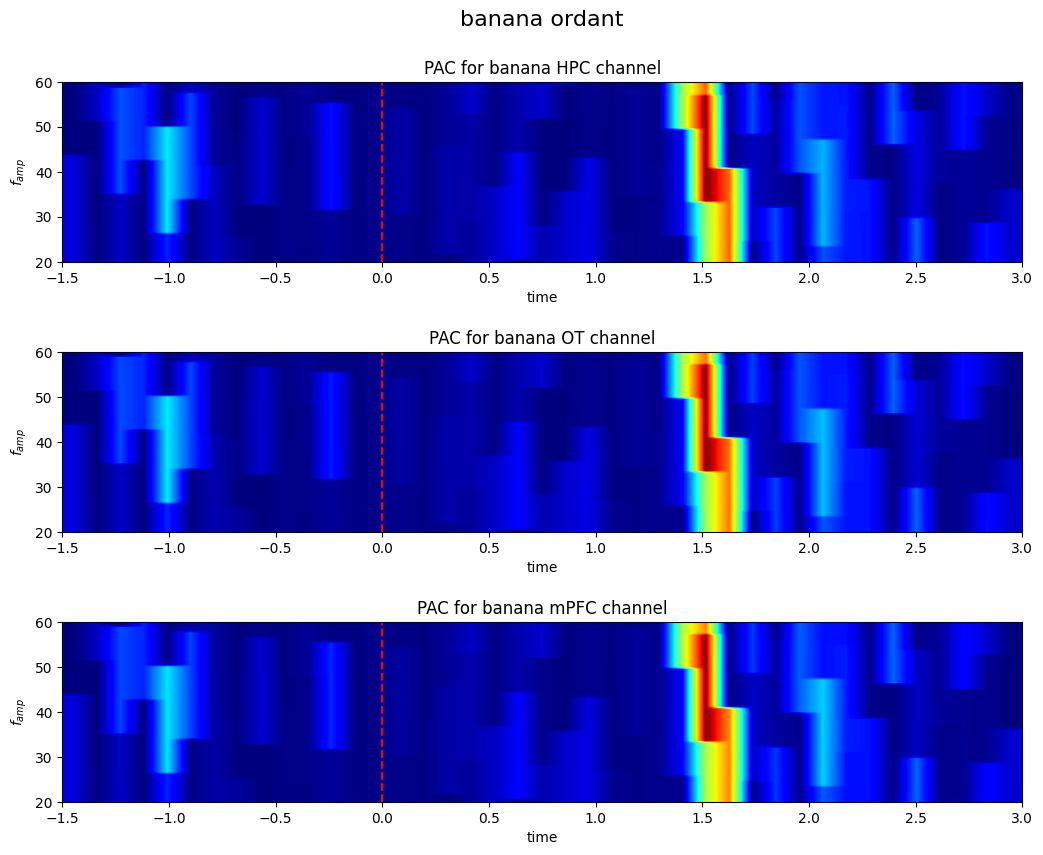

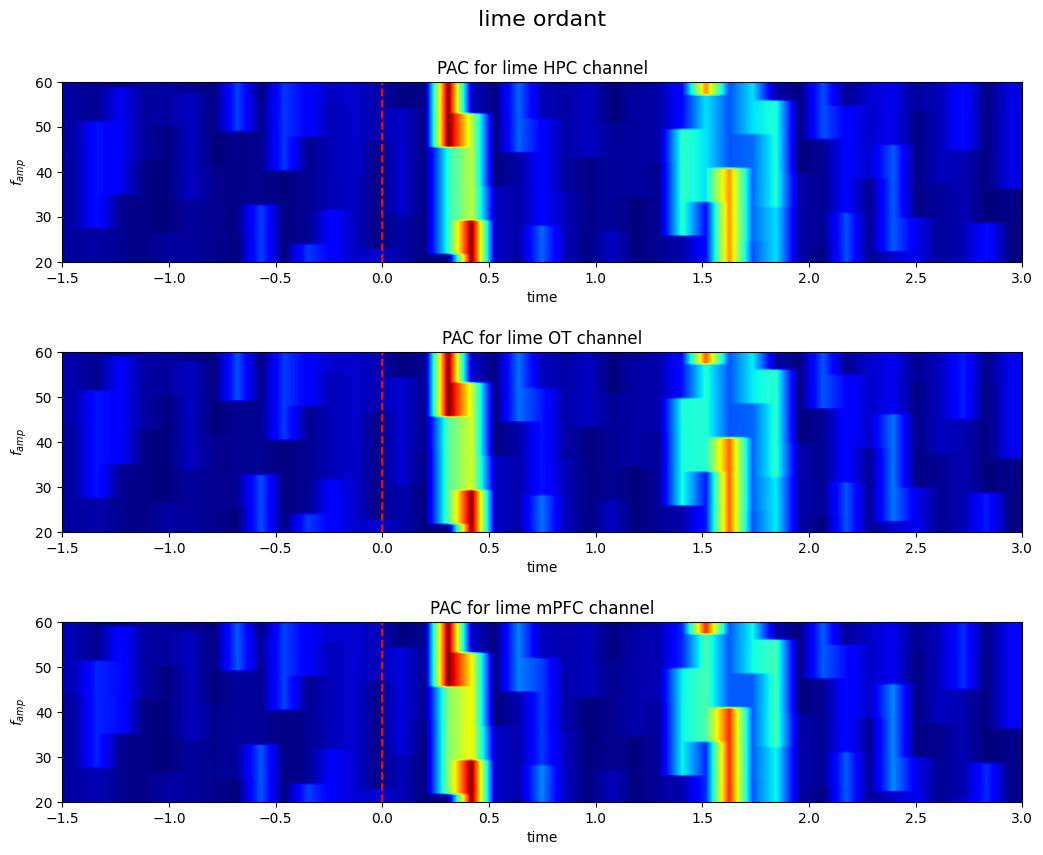

In [180]:
plt.figure(figsize=(12, 9))
plt.suptitle('banana ordant', fontsize=16)
plt.subplot(3, 1,1)
plt.imshow(np.transpose(PAC_banana_HPC),extent=[-1.5,3,20,60],
        aspect='auto', origin='lower', cmap='jet', interpolation='bilinear')
plt.xlabel('time')
plt.ylabel('$f_{amp}$')
plt.title('PAC for banana HPC channel')
plt.axvline(x=0, color='r', linestyle='--')
plt.subplot(3, 1,2)
plt.imshow(np.transpose(PAC_banana_OT),extent=[-1.5,3,20,60],
        aspect='auto', origin='lower', cmap='jet', interpolation='bilinear')
plt.xlabel('time')
plt.ylabel('$f_{amp}$')
plt.title('PAC for banana OT channel')
plt.axvline(x=0, color='r', linestyle='--')
plt.subplot(3, 1,3)
plt.imshow(np.transpose(PAC_banana_mPFC),extent=[-1.5,3,20,60],
        aspect='auto', origin='lower', cmap='jet', interpolation='bilinear')
plt.xlabel('time')
plt.ylabel('$f_{amp}$')
plt.title('PAC for banana mPFC channel'),
plt.axvline(x=0, color='r', linestyle='--')
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.5)
##########
plt.figure(figsize=(12,9))
plt.suptitle('lime ordant', fontsize=16)
plt.subplot(3, 1,1)
plt.imshow(np.transpose(PAC_lime_HPC),extent=[-1.5,3,20,60],
        aspect='auto', origin='lower', cmap='jet', interpolation='bilinear')
plt.xlabel('time')
plt.ylabel('$f_{amp}$')
plt.title('PAC for lime HPC channel')
plt.axvline(x=0, color='r', linestyle='--')
plt.subplot(3, 1,2)
plt.imshow(np.transpose(PAC_lime_OT),extent=[-1.5,3,20,60],
        aspect='auto', origin='lower', cmap='jet', interpolation='bilinear')
plt.xlabel('time')
plt.ylabel('$f_{amp}$')
plt.title('PAC for lime OT channel')
plt.axvline(x=0, color='r', linestyle='--')
plt.subplot(3, 1,3)
plt.imshow(np.transpose(PAC_lime_mPFC),extent=[-1.5,3,20,60],
        aspect='auto', origin='lower', cmap='jet', interpolation='bilinear')
plt.xlabel('time')
plt.ylabel('$f_{amp}$')
plt.title('PAC for lime mPFC channel')
plt.axvline(x=0, color='r', linestyle='--')
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.5)

You should generate plots like this between all channels for both odorants:<br>

![](./Figures/05-PAC-vtime.png)<br>
*figure description: tv-PAC of hippocampus theta phase and hippocampus low gamma amplitude*

# Bonus: Modulation Index (MI) `+10 Points`